In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import SimpleITK as sitk

import util
import importlib
importlib.reload(util)

pd.set_option('display.width', 120)

In [5]:
label_mapper = {
    1: 'nodule',
    5: 'stripe',
    31: 'artery',
    32: 'lymph',
}

(-175.0, -19.200000762939453, -273.6700134277344)
(0.68359375, 0.68359375, 5.0)
(50, 512, 512)
-1024 1841


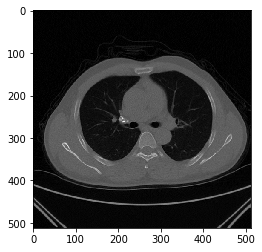

In [6]:
seriesuid = 636990
mhd_file = '../train/{}.mhd'.format(seriesuid)
itk_image = sitk.ReadImage(mhd_file)

origin = itk_image.GetOrigin()
spacing = itk_image.GetSpacing()
image3d = sitk.GetArrayFromImage(itk_image)

print(origin)
print(spacing)
print(image3d.shape)
print(image3d.min(), image3d.max())
plt.imshow(image3d[28], cmap=plt.cm.gray)

In [7]:
df = pd.read_csv('./annotation_voxel.csv')
df_anno = df[df['seriesuid'] == seriesuid]
print(df_anno)

   seriesuid  coordX  coordY  coordZ  diameterX  diameterY  diameterZ  label
0     636990     214     257      28         31         21          3     32
1     636990     210     232      31         15         20          3     32
2     636990     237     258      35         27         28          6     32
3     636990     158     218      33         13         12          1      1
4     636990     171     200      34         11         15          1      1
5     636990     270     252      36         18         10          1     31


In [9]:
df.groupby(['label'])['label'].count()
# df['label'].describe()

label
1     3264
5     3613
31    4201
32    1140
Name: label, dtype: int64

In [14]:
df['diameterZ'].describe()

count    12218.000000
mean         1.826567
std          1.854216
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         50.000000
Name: diameterZ, dtype: float64

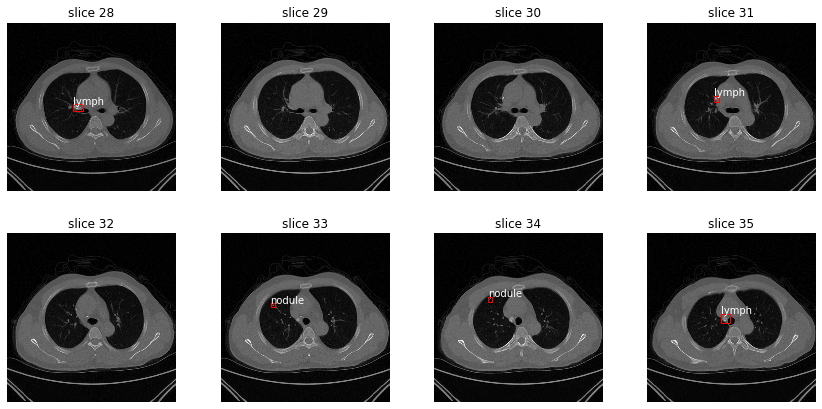

In [8]:
util.plot_ct(image3d, start=28, end=36, annotation_df=df_anno, label_mapper=label_mapper)

0.0 1.0 0.2611090437316897


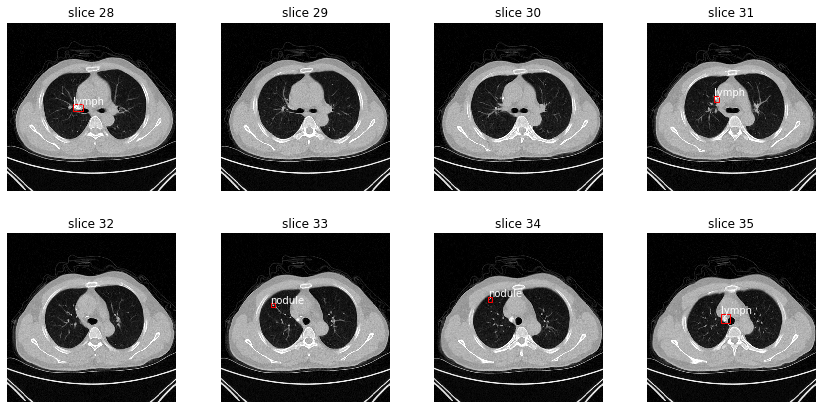

In [13]:
image_normal = util.normalize(image3d, ww=1500, wl=-250)
print(image_normal.min(), image_normal.max(), image_normal.mean())
util.plot_ct(image_normal, start=28, end=36, annotation_df=df_anno, label_mapper=label_mapper)

In [14]:
image_resample, resize_factor = util.resample(image_normal, spacing)
print(image_resample.shape)
print(resize_factor)

(250, 350, 350)
[0.68359375 0.68359375 5.        ]


In [15]:
df_anno_rs = util.resample_annotation(df_anno, resize_factor)
print(df_anno_rs)

   seriesuid  coordX  coordY  coordZ  diameterX  diameterY  diameterZ  label
0     636990     146     176     140         21         14         15     32
1     636990     144     159     155         10         14         15     32
2     636990     162     176     175         18         19         30     32
3     636990     108     149     165          9          8          5      1
4     636990     117     137     170          8         10          5      1
5     636990     185     172     180         12          7          5     31


In [16]:
df_anno_rs['diameterZ'].describe()

count     6.000000
mean     12.500000
std       9.874209
min       5.000000
25%       5.000000
50%      10.000000
75%      15.000000
max      30.000000
Name: diameterZ, dtype: float64

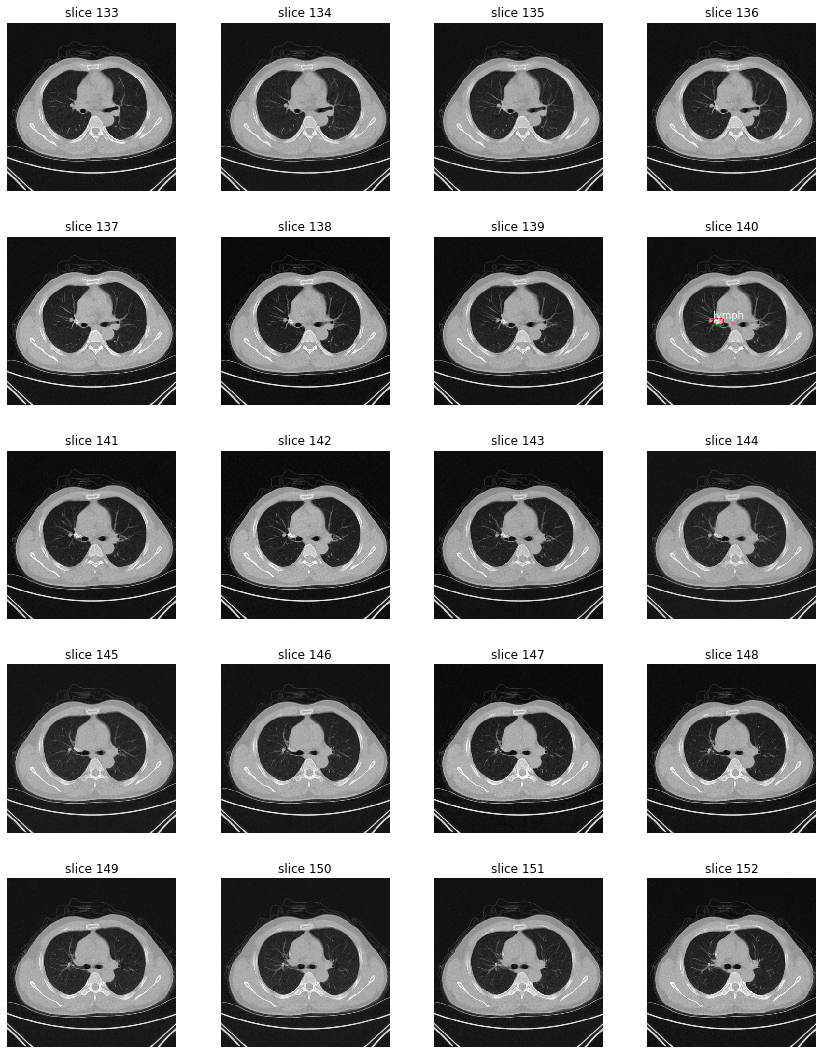

In [19]:
util.plot_ct(image_resample, start=133, end=153, annotation_df=df_anno_rs, label_mapper=label_mapper)